In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers

In [7]:
data_train_path = '/kaggle/input/mvtec-ad/tile/train'
data_valid_path = '/kaggle/input/mvtec-ad/tile/ground_truth'

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Data Generator for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    data_train_path,
    shuffle = True,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    data_valid_path,
    shuffle = True,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 230 images belonging to 1 classes.
Found 84 images belonging to 5 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Debugging output
print(f"Train samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")
print(f"Steps per epoch: {train_generator.samples // train_generator.batch_size}")
print(f"Validation steps: {validation_generator.samples // validation_generator.batch_size}")

# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    batch_size = 32,
    validation_data=validation_generator
)



Train samples: 230
Validation samples: 84
Steps per epoch: 7
Validation steps: 2


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 981ms/step - accuracy: 1.0000 - loss: 0.1937 - val_accuracy: 0.2024 - val_loss: 123.9475
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 953ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.2024 - val_loss: 230.3497
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 884ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.2024 - val_loss: 295.6001
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 880ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.2024 - val_loss: 330.6814
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 891ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.2024 - val_loss: 348.3224


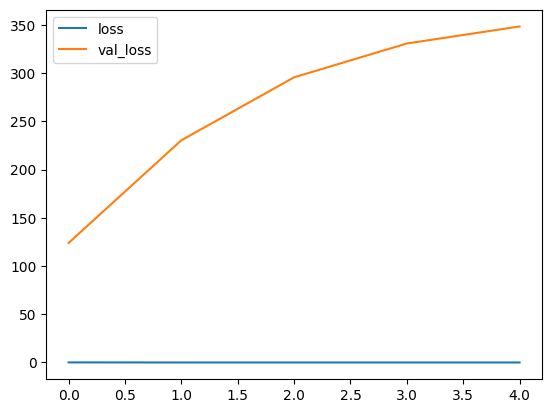

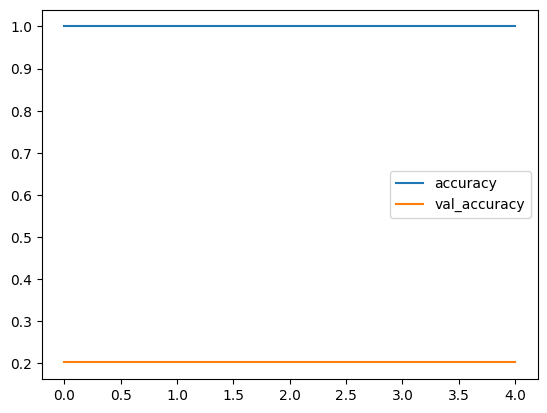

In [10]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();